##  OS Simulation with Crime Data
This notebook simulates core OS concepts using crime data — like memory management (RAM), CPU scheduling, multithreading, and disk I/O operations.

##README Summary
- **Project Goal**: Simulate OS resource management using crime data.
- **Concepts Covered**: RAM simulation, CPU load, scheduling, multithreading.
- **Tools**: Python, pandas, matplotlib, seaborn

### Code Comments
All code cells include inline comments for clarity.

### Architecture Diagram
```
[Crime CSV] → [Load to DataFrame] → [Process into DATE/HOUR] →
[Memory Simulation] + [CPU Threading Simulation] → [Visualization]
```

##  🗡  Step 1: Import Libraries & Setup Logging

In [22]:
# Import necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

# Setup basic logging system to simulate OS log messages
logging.basicConfig(filename='os_sim_log.txt', level=logging.INFO)
logging.info(f"{datetime.now()} - Script started.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  🗡  Step 2: Load Dataset with Error Handling

In [23]:
# Try to load the CSV data — if missing, log an error
try:
    df = pd.read_csv("/content/drive/MyDrive/Crime_Incidents_in_2024.csv")
    #df = pd.read_csv('/content/Crime_Incidents_in_2024.csv')
    logging.info(f"{datetime.now()} - Successfully loaded dataset with {len(df)} rows.")
except FileNotFoundError:
    logging.error("Crime_Incidents_in_2024.csv not found.")
    print("Crime_Incidents_in_2024.csv not found locally.")

##  🗡  Step 3: Data Cleaning and Preprocessing

In [24]:
# Strip column names and convert REPORT_DAT to datetime
df.columns = df.columns.str.strip()
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'], errors='coerce')
# Extract date and hour for OS-like time slicing
df['DATE'] = df['REPORT_DAT'].dt.date
df['HOUR'] = df['REPORT_DAT'].dt.hour

##  🗡  Step 4: Overload Analysis and Visualization
Identify top overload days, average overload by weekday and season.

SHIFT        DAY  EVENING  MIDNIGHT  TOTAL_OVERLOAD
DATE                                               
2024-10-08  55.0     53.0      21.0           129.0
2024-10-24  52.0     53.0      22.0           127.0
2024-05-29  46.0     51.0      26.0           123.0
2024-08-06  45.0     58.0      20.0           123.0
2024-11-25  44.0     55.0      21.0           120.0


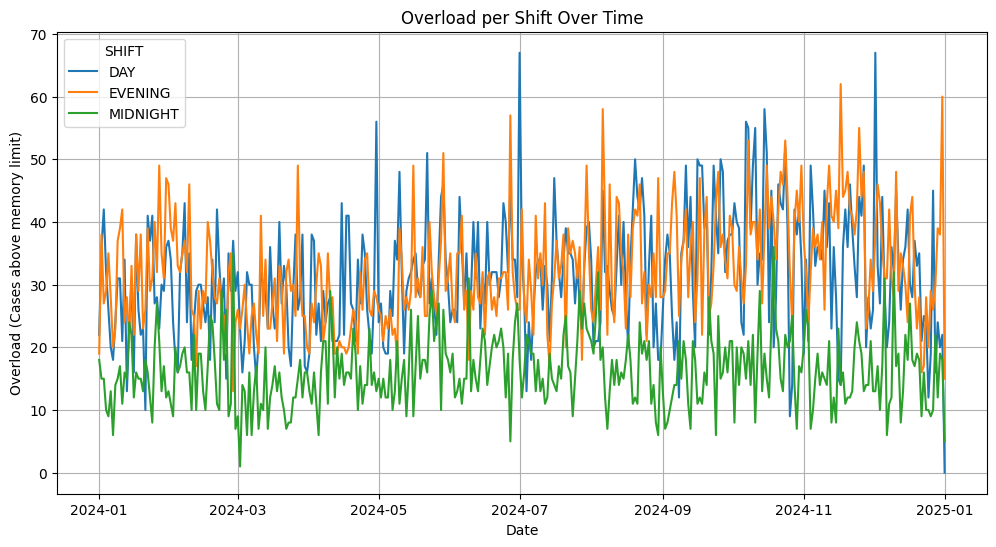

In [25]:
# Count number of crimes in each date
shift_load = df.groupby(['DATE', 'SHIFT']).size().reset_index(name='Load')
# Pivot the data so each shift becomes a column (like separate memory blocks)
pivot_load = shift_load.pivot(index='DATE', columns='SHIFT', values='Load').fillna(0)

# Calculate memory overload: cases that exceed shift capacity
overload = pivot_load.copy()

# Calculate total overload per day
overload['TOTAL_OVERLOAD'] = overload.sum(axis=1)

# Top 5 days with most overloads
top_overload_days = overload.sort_values('TOTAL_OVERLOAD', ascending=False).head(5)
print(top_overload_days)

# Plot overload trends
overload[['DAY', 'EVENING', 'MIDNIGHT']].plot(kind='line', figsize=(12,6))
plt.title('Overload per Shift Over Time')
plt.ylabel('Overload (Cases above memory limit)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

###  🗡  VISUALIZE MEMORY LOAD

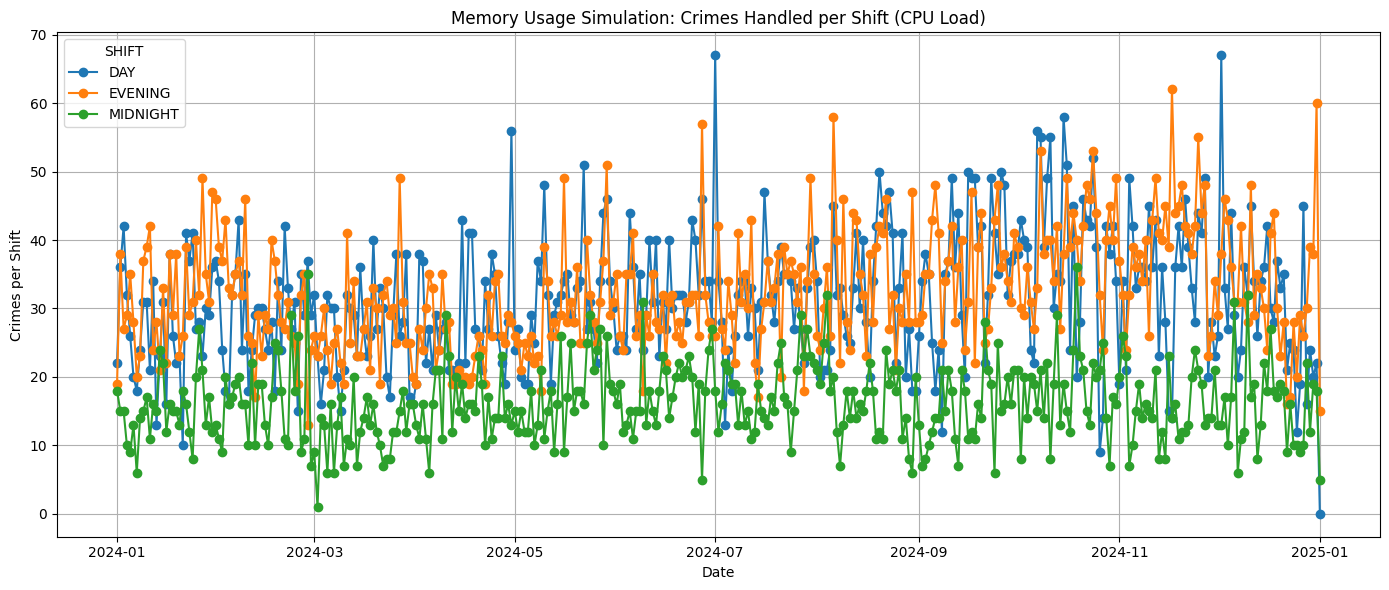

In [26]:

pivot_load.plot(kind='line', figsize=(14,6), marker='o')
plt.title('Memory Usage Simulation: Crimes Handled per Shift (CPU Load)')
plt.xlabel('Date')
plt.ylabel('Crimes per Shift')
plt.grid(True)
plt.tight_layout()
plt.show()

##  🗡  Step 5: Memory Management Simulation
Simulate fixed RAM capacity per shift and calculate overload.

In [27]:
# Define RAM capacity for each shift (like limited memory available)
memory_capacity = {'DAY': 50, 'EVENING': 60, 'MIDNIGHT': 40}

# Count number of crimes in each date
shift_load = df.groupby(['DATE', 'SHIFT']).size().reset_index(name='Load')
# Pivot the data so each shift becomes a column (like separate memory blocks)
pivot_load = shift_load.pivot(index='DATE', columns='SHIFT', values='Load').fillna(0)

# Calculate memory overload: cases that exceed shift capacity
overload = pivot_load.copy()
for shift in memory_capacity:
    overload[shift] = overload[shift] - memory_capacity[shift]
    overload[shift] = overload[shift].apply(lambda x: x if x > 0 else 0)



### ❀ Developer Guide for Memory Manager  
- Edit `memory_capacity = {...}`  
- Extend overload calc loop per new logic  
- Add new visual block to plot overload per priority  


###  ✮⋆˙Advanced Tutorial: How to Extend the Memory Manager

To make the memory management more efficient and realistic:

#### Dynamic Memory Based on Crime Type or Day
- Assign different memory capacities per shift based on day of week:
  ```python
  def get_dynamic_memory(date):
      if pd.to_datetime(date).weekday() in [4, 5]:  # Friday, Saturday
          return {'DAY': 70, 'EVENING': 80, 'MIDNIGHT': 60}
      else:
          return {'DAY': 50, 'EVENING': 60, 'MIDNIGHT': 40}
  ```

- Use this inside the overload calculation loop.

####  Real-Time Simulation
- Use sliding windows to simulate crimes arriving in real-time by hour instead of date.

####  Prioritized Memory Allocation
- Reserve extra capacity for high-priority crimes:
  ```python
  if shift == 'MIDNIGHT' and df[df['PRIORITY'] == 1].shape[0] > threshold:
      memory_capacity['MIDNIGHT'] += 20
  ```

---

###  Developer Guide: Future-Proof Memory Manager

-  Wrap memory management logic into a reusable function or class
-  Add logging and memory history tracking per shift over time
-  Build a dashboard using `plotly` or `seaborn` to visualize shift loads and bottlenecks
-  Add unit tests for boundary scenarios: overload = 0, shift missing, no crimes

These enhancements allow the simulation to mimic a real operating system’s **dynamic memory handling** and scale for larger datasets or longer timeframes.


##  🗡  Step 6: Weekly and Seasonal Overload Patterns
Visualize how overload varies across weekdays and seasons.

SHIFT        DAY  EVENING  MIDNIGHT  TOTAL_OVERLOAD
DATE                                               
2024-12-02  17.0      0.0         0            17.0
2024-07-01  17.0      0.0         0            17.0
2024-10-15   8.0      0.0         0             8.0
2024-04-30   6.0      0.0         0             6.0
2024-10-07   6.0      0.0         0             6.0
2024-10-11   5.0      0.0         0             5.0
2024-10-08   5.0      0.0         0             5.0
2024-11-17   0.0      2.0         0             2.0
2024-10-24   2.0      0.0         0             2.0
2024-05-22   1.0      0.0         0             1.0
SHIFT           DAY   EVENING  MIDNIGHT
WEEKDAY                                
Monday     0.754717  0.000000       0.0
Tuesday    0.358491  0.000000       0.0
Wednesday  0.037736  0.000000       0.0
Thursday   0.038462  0.000000       0.0
Friday     0.096154  0.000000       0.0
Saturday   0.000000  0.000000       0.0
Sunday     0.000000  0.038462       0.0
SHIFT        DAY

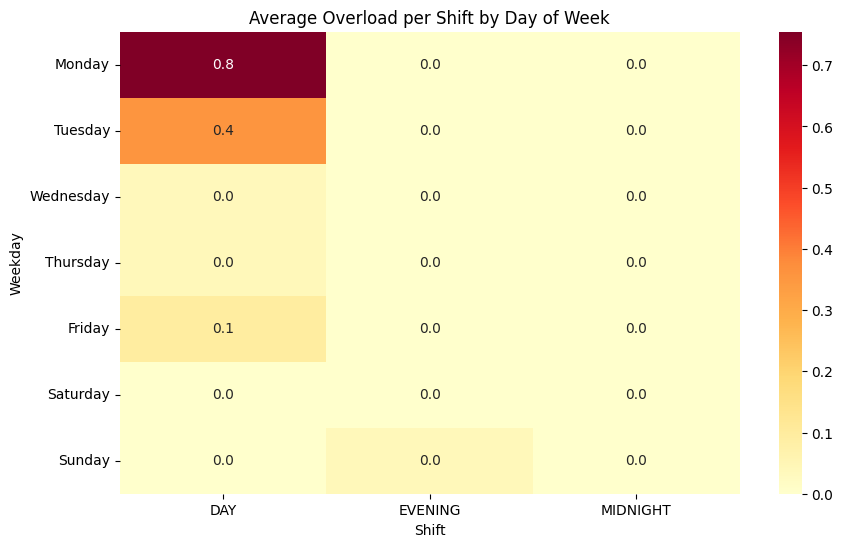

In [28]:
# Sum of overload un each day
overload['TOTAL_OVERLOAD'] = overload.sum(axis=1)

# The highest overload day
top_overload_days = overload.sort_values('TOTAL_OVERLOAD', ascending=False).head(10)
print(top_overload_days)

# Add weekday overload column
df['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.day_name()
overload['WEEKDAY'] = pd.to_datetime(overload.index).day_name()
weekday_overload = overload.groupby('WEEKDAY')[['DAY', 'EVENING', 'MIDNIGHT']].mean()

# Reorder days to match calendar week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_overload = weekday_overload.loc[ordered_days]
print(weekday_overload)

# Map month to season
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'
overload['SEASON'] = pd.to_datetime(overload.index).month.map(get_season)
seasonal_overload = overload.groupby('SEASON')[['DAY', 'EVENING', 'MIDNIGHT']].mean()
print(seasonal_overload)

# Heatmap of overload by weekday and shift
heatmap_data = overload.groupby('WEEKDAY')[['DAY', 'EVENING', 'MIDNIGHT']].mean()
heatmap_data = heatmap_data.loc[ordered_days]
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Average Overload per Shift by Day of Week")
plt.ylabel("Weekday")
plt.xlabel("Shift")
plt.show()

##  🗡  Step 7: Process Scheduling
Simulate process priority and Round-Robin scheduling for crimes.

###Why Specific Scheduling Algorithms?
We used:

Priority Scheduling – to ensure urgent crimes (like HOMICIDE) are handled first, simulating how an OS gives priority to critical tasks.

Round-Robin Scheduling – to fairly distribute attention across multiple cases, simulating time-sharing in multitasking systems.

###  ❀ ˖Mini-Tutorial  
#### How to Add a New Scheduler  
1. Create a function `schedule_by_priority(df)`  
2. Rank crimes by severity  
3. Replace `groupby(['SHIFT'])` with `groupby(['PRIORITY'])`  

---|

In [29]:
# Assign priority to crimes for scheduling
priority_map = {
    'HOMICIDE': 1,
    'SEX ABUSE': 2,
    'ASSAULT W/DANGEROUS WEAPON': 3,
    'ROBBERY': 4,
    'BURGLARY': 5,
    'THEFT F/AUTO': 6,
    'THEFT/OTHER': 7
}
df['PRIORITY'] = df['OFFENSE'].map(priority_map).fillna(8)

# Sort crimes by priority (like queueing in OS)
scheduled_crimes = df.sort_values(by=['PRIORITY', 'REPORT_DAT'])
# Show top 10 scheduled crimes
scheduled_crimes[['REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'PRIORITY']].head(30)


,REPORT_DAT,SHIFT,OFFENSE,METHOD,PRIORITY
1474,2024-01-01 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
3553,2024-01-04 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
3509,2024-01-16 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
20345,2024-01-18 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
28690,2024-01-19 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
6082,2024-01-22 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
12954,2024-01-23 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
1037,2024-01-25 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
24595,2024-01-29 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0
6686,2024-02-03 05:00:00+00:00,MIDNIGHT,HOMICIDE,GUN,1.0


In [30]:
# Filter only high-priority crimes (priority 1 to 3)
high_priority = df[df['PRIORITY'] <= 3]

# Count how many high-priority crimes happened in each shift (DAY, EVENING, MIDNIGHT)
high_priority_by_shift = high_priority['SHIFT'].value_counts()
print(high_priority_by_shift)

# Simulate "wait time" as if each crime is processed one-by-one in queue order
scheduled_crimes['WAIT_TIME'] = range(len(scheduled_crimes))

# Calculate the average wait time grouped by each priority level
average_wait = scheduled_crimes.groupby('PRIORITY')['WAIT_TIME'].mean()
print(average_wait)


SHIFT
MIDNIGHT    691
EVENING     440
DAY         225
Name: count, dtype: int64
PRIORITY
1.0       93.0
2.0      257.5
3.0      842.0
4.0     2410.0
5.0     3966.5
6.0     7808.5
7.0    17653.5
8.0    26722.0
Name: WAIT_TIME, dtype: float64


In [31]:
# Step 1: Filter crimes with priority 1 to 5 (important cases)
round_robin_df = df[df['PRIORITY'] <= 5].copy()

# Step 2: Group crimes by priority and prepare them as queues
from itertools import cycle

# Create a list of dataframes, each for a different priority level
queues = [g for _, g in round_robin_df.groupby('PRIORITY')]

# Use cycle to rotate through each priority group (like round-robin scheduling)
cyclic = cycle(queues)

# Interleave crimes from each queue one at a time (simulate round-robin)
result = []
while any(not g.empty for g in queues):
    for g in queues:
        if not g.empty:
            result.append(g.iloc[0])         # Take the first crime in the queue
            g.drop(g.index[0], inplace=True) # Remove it from the queue

# Create a new DataFrame of the crimes ordered in round-robin sequence
round_robin_result = pd.DataFrame(result)

# Show first 10 rows of round-robin scheduled crimes
round_robin_result[['REPORT_DAT', 'SHIFT', 'OFFENSE', 'PRIORITY']].head(10)


,REPORT_DAT,SHIFT,OFFENSE,PRIORITY
0,2024-07-30 04:00:00+00:00,MIDNIGHT,HOMICIDE,1.0
55,2024-08-23 21:25:28+00:00,EVENING,SEX ABUSE,2.0
27,2024-08-12 08:28:37+00:00,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,3.0
11,2024-07-31 07:47:26+00:00,MIDNIGHT,ROBBERY,4.0
98,2024-09-11 14:25:44+00:00,DAY,BURGLARY,5.0
1,2024-06-20 04:00:00+00:00,MIDNIGHT,HOMICIDE,1.0
500,2024-05-26 21:40:18+00:00,EVENING,SEX ABUSE,2.0
42,2024-08-16 23:42:10+00:00,EVENING,ASSAULT W/DANGEROUS WEAPON,3.0
28,2024-08-13 14:58:43+00:00,DAY,ROBBERY,4.0
120,2024-02-21 14:59:11+00:00,DAY,BURGLARY,5.0


In [32]:
# Filter only high-priority crimes (priority 1 to 3)
high_priority = df[df['PRIORITY'] <= 3]

# Count how many high-priority crimes happened in each shift (DAY, EVENING, MIDNIGHT)
shift_priority_counts = high_priority['SHIFT'].value_counts()
print("High-priority crimes per SHIFT:\n", shift_priority_counts)

# Count the number of high-priority crimes for each hour of the day (0–23), sorted in order
hour_priority_counts = high_priority['HOUR'].value_counts().sort_index()
print("\nHigh-priority crimes per HOUR:\n", hour_priority_counts)

High-priority crimes per SHIFT:
 SHIFT
MIDNIGHT    691
EVENING     440
DAY         225
Name: count, dtype: int64

High-priority crimes per HOUR:
 HOUR
0      42
1      72
2      80
3      57
4     207
5     113
6      74
7      82
8      81
9      56
10     38
11     26
12     16
13      9
14     21
15     28
16     35
17     43
18     43
19     45
20     39
21     42
22     52
23     55
Name: count, dtype: int64


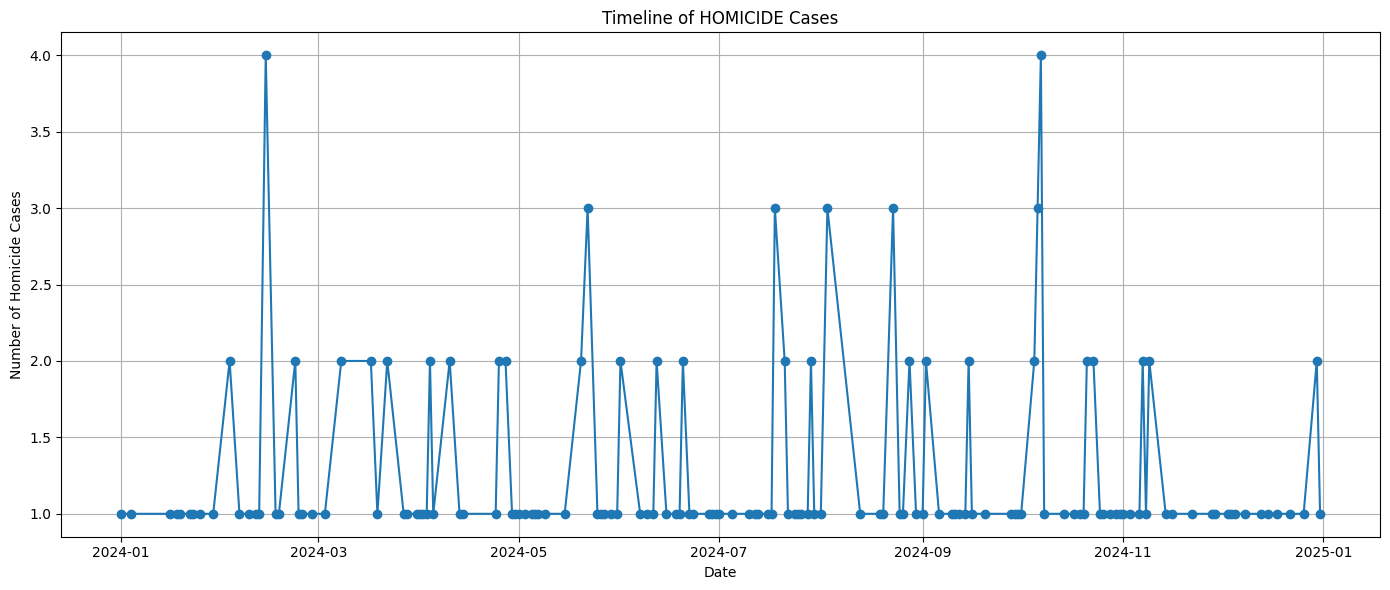

In [33]:
import matplotlib.pyplot as plt

# Filter only HOMICIDE cases
homicide = df[df['OFFENSE'] == 'HOMICIDE']

# Count number of homicides per day
homicide_timeline = homicide.groupby('DATE').size()

# Plot a timeline showing when homicide cases occurred
plt.figure(figsize=(14, 6))
homicide_timeline.plot(kind='line', marker='o')
plt.title("Timeline of HOMICIDE Cases")
plt.xlabel("Date")
plt.ylabel("Number of Homicide Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


##  🗡  Step 8: Parallel Processing Simulation
Simulate how multiple crimes (processes) happen concurrently like multithreaded execution.

In [34]:
# Filter top 6 crime types (simulate high CPU load types)
top_offenses = df['OFFENSE'].value_counts().nlargest(6).index
df_filtered = df[df['OFFENSE'].isin(top_offenses)]

# Group by hour and offense, count occurrences
crime_parallel = df_filtered.groupby(['HOUR', 'OFFENSE']).size().unstack(fill_value=0)

#  Add total crimes per hour (like CPU load at that hour)
crime_parallel['TOTAL'] = crime_parallel.sum(axis=1)

# Display sample
print(crime_parallel.head())



OFFENSE  ASSAULT W/DANGEROUS WEAPON  BURGLARY  MOTOR VEHICLE THEFT  ROBBERY  \
HOUR                                                                          
0                                31        30                  249      108   
1                                64        41                  296      121   
2                                71        42                  297      164   
3                                52        24                  246      166   
4                                60        23                  198      143   

OFFENSE  THEFT F/AUTO  THEFT/OTHER  TOTAL  
HOUR                                       
0                 255          727   1400  
1                 249          753   1524  
2                 246          615   1435  
3                 178          444   1110  
4                 143          307    874  


<ipython-input-35-115932ba4c07>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')


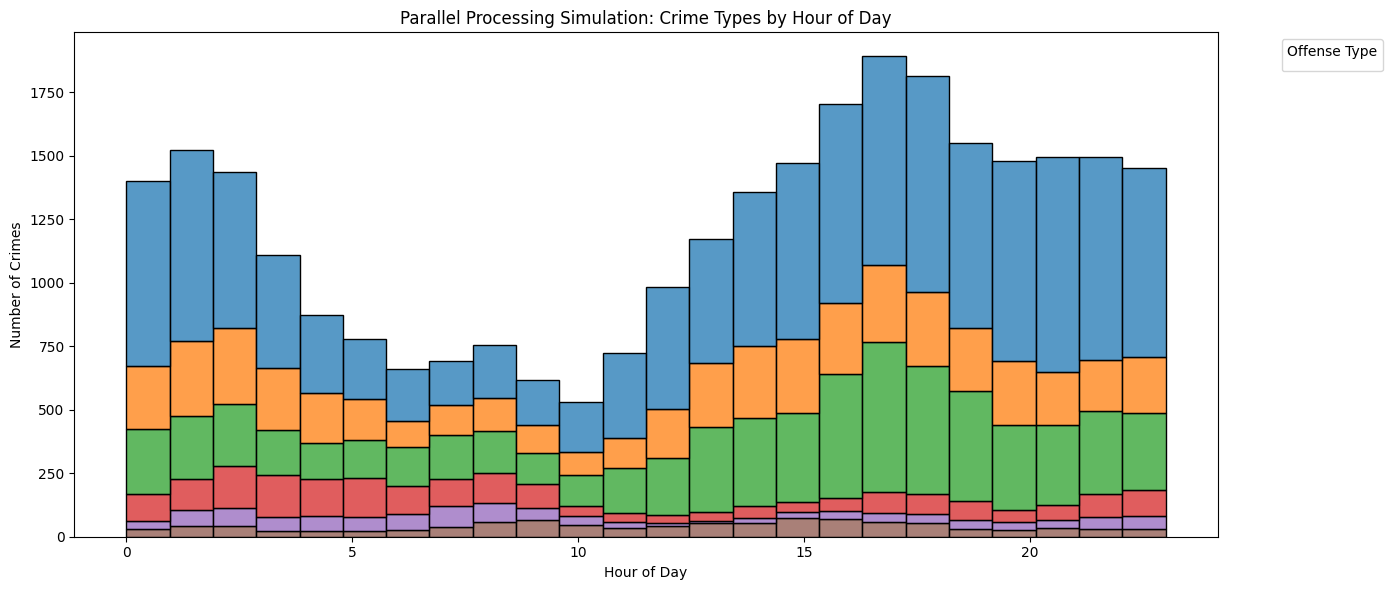

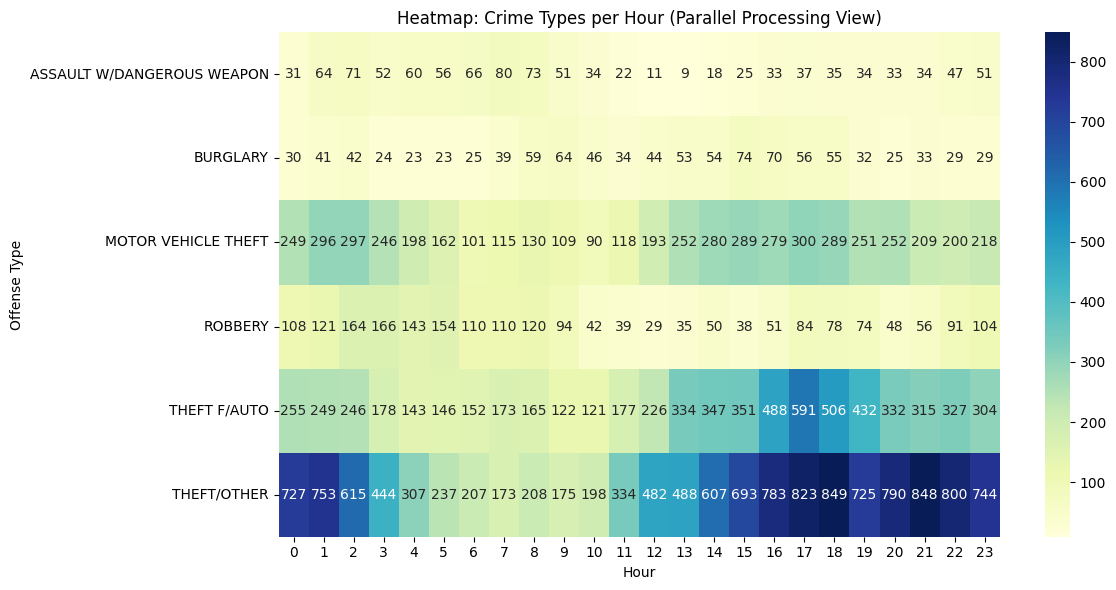

In [35]:
# Select top 6 most frequent crimes for concurrency simulation
top_offenses = df['OFFENSE'].value_counts().nlargest(6).index
df_filtered = df[df['OFFENSE'].isin(top_offenses)]

# Plot stacked histogram by hour (simulating CPU time slots per thread)
plt.figure(figsize=(14,6))
sns.histplot(data=df_filtered, x='HOUR', hue='OFFENSE', multiple='stack', bins=24)
plt.title("Parallel Processing Simulation: Crime Types by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Build heatmap of hourly crime loads
crime_parallel = df_filtered.groupby(['HOUR', 'OFFENSE']).size().unstack(fill_value=0)
crime_parallel['TOTAL'] = crime_parallel.sum(axis=1)
plt.figure(figsize=(12, 6))
sns.heatmap(crime_parallel.drop(columns='TOTAL').T, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap: Crime Types per Hour (Parallel Processing View)")
plt.xlabel("Hour")
plt.ylabel("Offense Type")
plt.tight_layout()
plt.show()

### Multithreading by ThreadPoolExecutor

In [36]:
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time
import random

# Simulate a crime dataset
df = pd.DataFrame({
    'OFFENSE': np.random.choice(['HOMICIDE', 'THEFT', 'ASSAULT', 'ROBBERY', 'BURGLARY'], size=20),
    'SHIFT': np.random.choice(['DAY', 'EVENING', 'MIDNIGHT'], size=20),
    'REPORT_DAT': pd.date_range(start='2024-01-01', periods=20, freq='H')
})
df['DATE'] = df['REPORT_DAT'].dt.date
df['HOUR'] = df['REPORT_DAT'].dt.hour

# Function to simulate processing a single crime record
def simulate_crime_task(index, row):
    process_name = f"{row['OFFENSE']} at {row['SHIFT']} (#{index})"
    total_time = 0
    for i in range(3):
      # Simulate 3 sub-tasks per case
      # Step 1: Report intake [Input/ I/O]
      # Step 2: Investigation & dispatch [Processing / Scheduling]
      # Step 3: Finish or Pass to Supervisor [Final output / cleanup]
        work_time = random.uniform(0.1, 0.5)
        print(f"{process_name} - Step {i+1} ({work_time:.2f}s)")
        time.sleep(work_time) #fake work
        total_time += work_time
    return f"{process_name} completed in {total_time:.2f}s"

# Execute all crime tasks in parallel using a thread pool
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(simulate_crime_task, idx, row) for idx, row in df.iterrows()]
    results = [future.result() for future in futures]

results[:5]  # Show only the first 5 results


<ipython-input-36-842cd610b198>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'REPORT_DAT': pd.date_range(start='2024-01-01', periods=20, freq='H')


THEFT at MIDNIGHT (#0) - Step 1 (0.20s)
ROBBERY at EVENING (#1) - Step 1 (0.43s)
ASSAULT at EVENING (#2) - Step 1 (0.42s)
BURGLARY at EVENING (#3) - Step 1 (0.16s)
HOMICIDE at DAY (#4) - Step 1 (0.31s)
BURGLARY at EVENING (#3) - Step 2 (0.43s)
THEFT at MIDNIGHT (#0) - Step 2 (0.45s)
HOMICIDE at DAY (#4) - Step 2 (0.24s)
ASSAULT at EVENING (#2) - Step 2 (0.42s)
ROBBERY at EVENING (#1) - Step 2 (0.15s)
HOMICIDE at DAY (#4) - Step 3 (0.22s)
ROBBERY at EVENING (#1) - Step 3 (0.28s)
BURGLARY at EVENING (#3) - Step 3 (0.48s)
THEFT at MIDNIGHT (#0) - Step 3 (0.15s)
HOMICIDE at MIDNIGHT (#5) - Step 1 (0.29s)
ASSAULT at EVENING (#6) - Step 1 (0.44s)
ASSAULT at EVENING (#2) - Step 3 (0.29s)
BURGLARY at MIDNIGHT (#7) - Step 1 (0.28s)
HOMICIDE at MIDNIGHT (#5) - Step 2 (0.19s)
BURGLARY at DAY (#8) - Step 1 (0.26s)
ASSAULT at EVENING (#9) - Step 1 (0.48s)
BURGLARY at MIDNIGHT (#7) - Step 2 (0.24s)
HOMICIDE at MIDNIGHT (#5) - Step 3 (0.12s)
ASSAULT at EVENING (#6) - Step 2 (0.13s)
BURGLARY at DAY (#

['THEFT at MIDNIGHT (#0) completed in 0.81s',
 'ROBBERY at EVENING (#1) completed in 0.86s',
 'ASSAULT at EVENING (#2) completed in 1.13s',
 'BURGLARY at EVENING (#3) completed in 1.07s',
 'HOMICIDE at DAY (#4) completed in 0.76s']

In [37]:
import pandas as pd
import numpy as np
import time
import random
from concurrent.futures import ThreadPoolExecutor
# 1. Create simulated dataset
df = pd.DataFrame({
    'OFFENSE': np.random.choice([
        'HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON',
        'ROBBERY', 'BURGLARY', 'THEFT F/AUTO', 'THEFT/OTHER'
    ], size=15),
    'SHIFT': np.random.choice(['DAY', 'EVENING', 'MIDNIGHT'], size=15),
    'REPORT_DAT': pd.date_range(start='2024-01-01', periods=15, freq='H')
})
df['DATE'] = df['REPORT_DAT'].dt.date
df['HOUR'] = df['REPORT_DAT'].dt.hour

# 2. Assign priority levels
priority_map = {
    'HOMICIDE': 1,
    'SEX ABUSE': 2,
    'ASSAULT W/DANGEROUS WEAPON': 3,
    'ROBBERY': 4,
    'BURGLARY': 5,
    'THEFT F/AUTO': 6,
    'THEFT/OTHER': 7
}
df['PRIORITY'] = df['OFFENSE'].map(priority_map).fillna(8)

# 3. Sort by priority and report time
df_sorted = df.sort_values(by=['PRIORITY', 'REPORT_DAT'])

# 4. Start simulation
simulation_start = time.time()
log_lines = []

# 5. Simulate each case as a parallel process
def simulate_crime_task(index, row):
    work_time = random.uniform(0.1, 0.5)
    wait_time = time.time() - simulation_start
    process_name = f"{row['OFFENSE']} at {row['SHIFT']} (#{index})"
    log_lines.append(f"🚨 {process_name:<50} | Work Time: {work_time:>5.2f}s")

    total_time = 0
    for i in range(3):
        step_start = time.time() - simulation_start  # actual time this step starts
        time.sleep(work_time)
        log_lines.append(
            f"    └─ Step {i+1:<2} [{work_time:>4.2f}s] "
            f"started at {step_start:>5.2f}s - {process_name}"
        )
        total_time += work_time

    finish_time = time.time() - simulation_start
    log_lines.append(
        f"📋 {process_name:<50} | Done in: {total_time:>5.2f}s "
        f"(Started at: {wait_time:>5.2f}s, Finished at: {finish_time:>5.2f}s)"
    )
    return process_name


# 6. Run threads
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [
        executor.submit(simulate_crime_task, idx, row)
        for idx, row in df_sorted.iterrows()
    ]
    # Wait for all threads to finish
    for f in futures:
        f.result()

# 7. Show final output AFTER all threads complete
print("\n🧾 SIMULATION LOG — All Crimes Processed:\n")
for line in log_lines:
    print(line)


<ipython-input-37-81a6445794c2>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'REPORT_DAT': pd.date_range(start='2024-01-01', periods=15, freq='H')



🧾 SIMULATION LOG — All Crimes Processed:

🚨 HOMICIDE at EVENING (#0)                           | Work Time:  0.48s
🚨 HOMICIDE at MIDNIGHT (#7)                          | Work Time:  0.35s
🚨 SEX ABUSE at DAY (#4)                              | Work Time:  0.45s
🚨 SEX ABUSE at EVENING (#6)                          | Work Time:  0.34s
🚨 SEX ABUSE at EVENING (#14)                         | Work Time:  0.11s
    └─ Step 1  [0.11s] started at  0.00s - SEX ABUSE at EVENING (#14)
    └─ Step 2  [0.11s] started at  0.11s - SEX ABUSE at EVENING (#14)
    └─ Step 3  [0.11s] started at  0.21s - SEX ABUSE at EVENING (#14)
📋 SEX ABUSE at EVENING (#14)                         | Done in:  0.32s (Started at:  0.00s, Finished at:  0.32s)
🚨 ASSAULT W/DANGEROUS WEAPON at EVENING (#3)         | Work Time:  0.34s
    └─ Step 1  [0.34s] started at  0.00s - SEX ABUSE at EVENING (#6)
    └─ Step 1  [0.35s] started at  0.00s - HOMICIDE at MIDNIGHT (#7)
    └─ Step 1  [0.45s] started at  0.00s - SEX ABUSE at DA

##  🗡 Step 9:Time Benchmarking
Simulate read/write latency using file export timing.

In [38]:
import time
import mmap
import pandas as pd
import numpy as np
import os
import psutil
import tracemalloc
from google.colab import drive
drive.mount('/content/drive')

# Create sample data [from step 3]
df = pd.read_csv('/content/drive/MyDrive/Crime_Incidents_in_2024.csv')
#df = pd.read_csv('/content/Crime_Incidents_in_2024.csv')
df.columns = df.columns.str.strip()
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'], errors='coerce')
df['DATE'] = df['REPORT_DAT'].dt.date
df['HOUR'] = df['REPORT_DAT'].dt.hour

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# -------------------------------
# CPU BENCHMARK
# -------------------------------

start = time.time()
total = sum(i * i for i in range(10**6))  # simple CPU-bound task
print(f"{' CPU':<4} Runtime: {time.time() - start:.4f} seconds")


# GPU runtime (if available)
try:
    import cupy as cp
    start = time.time()
    x = cp.random.rand(2000, 2000)          # Create random matrix on GPU
    _ = x @ x                               # Matrix multiplication on GPU
    cp.cuda.Stream.null.synchronize()       # Wait for GPU to finish

    print(f" GPU Runtime: {time.time() - start:.4f} sec")
except Exception as e:
    print("GPU not available or failed:")

# -------------------------------
# MEMORY BENCHMARK
# -------------------------------
# process info
process = psutil.Process(os.getpid())

# Measure memory before heavy transformation
mem_before = process.memory_info().rss / 1024**2  # in MiB
tracemalloc.start()
# Simulate heavy memory operation
df_copy = df.copy()
df_copy['NEW_COL'] = df_copy['OFFENSE'].apply(lambda x: str(x) * 1000)  # expand strings

# Calculate peak memory used
current, peak = tracemalloc.get_traced_memory()
print(f" Peak Memory Used: { peak / 1024**2:.2f} MiB")
tracemalloc.stop()

# Delay to allow memory usage to stabilize
time.sleep(0.5)

# Measure memory after
mem_after = process.memory_info().rss / 1024**2  # in MiB

# Calculate memory used
mem_used = mem_after - mem_before
print(f" Memory Used: {mem_used:.2f} MiB")


# -------------------------------
# DISK I/O BENCHMARK
# -------------------------------

# Write CSV (simulate file write latency)
start_write = time.time()
#df.to_csv("/content/drive/MyDrive/disk_benchmark.csv", index=False)
df.to_csv("disk_benchmark.csv", index=False)
end_write = time.time()
write_latency = end_write - start_write

# Read CSV (simulate file read latency)
start_read = time.time()
df_read = pd.read_csv("disk_benchmark.csv")
end_read = time.time()
read_latency = end_read - start_read

print(f" Disk Write Time: {write_latency:.4f} sec")
print(f" Disk Read Time:  {read_latency:.4f} sec")



 CPU Runtime: 0.0628 seconds
 GPU Runtime: 0.1834 sec
 Peak Memory Used: 364.33 MiB
 Memory Used: 9.34 MiB
 Disk Write Time: 0.6681 sec
 Disk Read Time:  0.1694 sec


### MMap VS Buffered CSV I/O

In [40]:
# Fixing unbuffered mode to use binary 'rb'
#csv_path = '/content/Crime_Incidents_in_2024.csv'
csv_path = '/content/drive/MyDrive/disk_benchmark.csv'

# 1. Buffered Read (standard)
start_buffered = time.time()
with open(csv_path, 'r', buffering=4096) as f:
    _ = f.read()
end_buffered = time.time()
buffered_time = end_buffered - start_buffered

# 2. Unbuffered Binary Read
start_unbuffered = time.time()
with open(csv_path, 'rb', buffering=0) as f:
    while True:
        chunk = f.read(1024)
        if not chunk:
            break
end_unbuffered = time.time()
unbuffered_time = end_unbuffered - start_unbuffered

# 3. Memory-Mapped Read
start_mmap = time.time()
with open(csv_path, 'rb') as f:
    with mmap.mmap(f.fileno(), length=0, access=mmap.ACCESS_READ) as mm:
        _ = mm.read()
end_mmap = time.time()
mmap_time = end_mmap - start_mmap

# Return benchmark results
print(f" Buffered Read Time (s):         {round(buffered_time, 6)}")
print(f" Unbuffered Binary Read Time (s): {round(unbuffered_time, 6)}")
print(f" Memory-Mapped Read Time (s):     {round(mmap_time, 6)}")


 Buffered Read Time (s):         0.021603
 Unbuffered Binary Read Time (s): 0.023183
 Memory-Mapped Read Time (s):     0.01707


##  🗡  Step 10: Logging System and Practical Adaptation
Track simulated OS operations and detect anomalies (e.g., memory log spikes).

In [41]:
from datetime import datetime

log_filename = "os_sim_log.txt"

# Step 1: Manually create and write logs
with open(log_filename, "w") as log:
    log.write(f"{datetime.now()} - Processed {len(df)} records.\n")
    log.write(f"{datetime.now()} - Simulated memory allocation for {len(df)} rows.\n")
    log.write(f"{datetime.now()} - Memory block exceeded at shift: MIDNIGHT\n")

# Step 2: Now safely read and analyze the log
try:
    with open(log_filename, "r") as log:
        lines = log.readlines()
        memory_events = sum('memory' in line.lower() for line in lines)
        print(f"Memory-related log entries found: {memory_events}")
except FileNotFoundError:
    print("❌ Log file not found.")

Memory-related log entries found: 2


In [42]:
# Log a custom memory operation event
import logging
logging.basicConfig(filename='os_sim_log.txt', level=logging.INFO)
logging.info(f"{datetime.now()} - Processed {len(df)} records.")

# Analyze logs for memory-related alerts
with open('os_sim_log.txt') as log:
    lines = log.readlines()
    print("Memory events:", sum('memory' in l.lower() for l in lines))

Memory events: 2


## Trade-Offs
- **CSV I/O vs mmap**: We chose pandas with buffered I/O for its simplicity and better support for structured, tabular data like crime logs. While mmap is faster for large files, it adds complexity and is better suited for low-level binary processing than for readable CSVs.
- **Sequential processing vs threading**: We simulate multithreading conceptually via hourly load rather than true concurrency to keep implementation simple and visualization effective.